In [10]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import greycomatrix, greycoprops
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


In [ ]:
# %run ../Combined_Features/COLD_HINGE_Compo.ipynb

In [18]:
%run ../Features/FindHogFeatures.ipynb

100%|██████████| 131/131 [00:08<00:00, 15.14it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2952/2446217812.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_data_cmp,  y_data_cmp = np.array(x_data_cmp), np.array(y_data_cmp)
  0%|          | 0/272 [00:00<?, ?it/s]


## Random Forest - Training

In [14]:
# Boost 100 weak decision trees
model = RandomForestClassifier(n_estimators=100)
#GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

model = model.fit(x_train, y_train)

## Random Forest - Testing

In [15]:
predictions = model.predict(x_test)
acc = {metrics.accuracy_score(y_test, predictions) * 100}
print(f" Model Accuracy is {acc}")

 Model Accuracy is {71.42857142857143}


## The Random Forest - ES Test 

In [ ]:
accs=[]
for i in tqdm(range(500)):
	model = RandomForestClassifier(n_estimators=300)
	model = model.fit(x_train, y_train)
	predictions = model.predict(x_test)
	accs.append(metrics.accuracy_score(y_test, predictions) * 100)
print(f" Model Accuracy is {np.mean(accs)}")


## Cross Validation

In [ ]:
x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))

accuracies = []

for i in tqdm(range(1, 200)):
   p = np.random.permutation(len(x_data))
   x_data = x_data[p]
   y_data = y_data[p]
   model = RandomForestClassifier(n_estimators=300)
   scores = cross_val_score(model, x_data, y_data, cv=5)
   accuracies.append(scores.mean() * 100)

accuracies = np.array(accuracies)
print(f" Model Accuracy by Cross Validation is {np.mean(accuracies)}%")


Model With PCA

In [47]:
accuracies = np.empty(10)
nums = np.arange(10,110,10)
for i in range(10,110,10):
    pca = PCA(n_components=i)
    train_data = pca.fit_transform(x_train)
    test_data = pca.transform(x_test)
    model = RandomForestClassifier(n_estimators=300)
    model = model.fit(train_data, y_train)
    predictions = model.predict(test_data)
    acc = metrics.accuracy_score(y_test, predictions) * 100
    accuracies [int(i/100-1)]= acc
    print(f" Model Accuracy is ",acc)



 Model Accuracy is  63.73626373626373
 Model Accuracy is  65.93406593406593
 Model Accuracy is  69.23076923076923
 Model Accuracy is  69.23076923076923
 Model Accuracy is  69.23076923076923
 Model Accuracy is  67.03296703296702
 Model Accuracy is  67.03296703296702
 Model Accuracy is  69.23076923076923
 Model Accuracy is  67.03296703296702
 Model Accuracy is  71.42857142857143


Ploting PCA accuracies

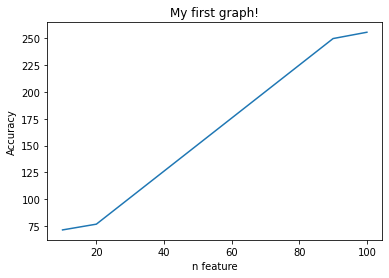

In [48]:
# plotting the points 
plt.plot(nums, accuracies)

# naming the x axis
plt.xlabel('n feature')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()